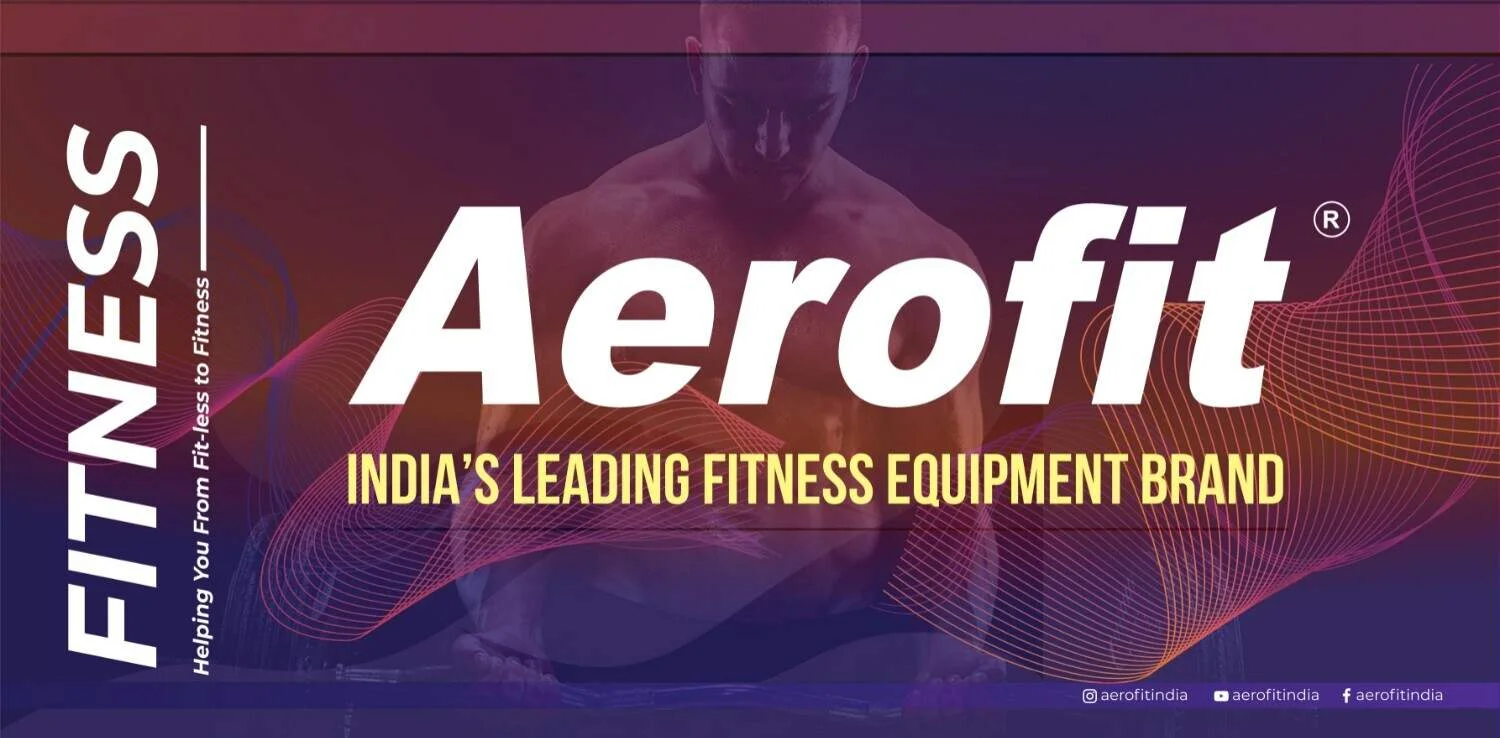

# Aerofit Business Case Study

## About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem
The market research team at Aerofit wants to identify the **characteristics of the target audience** for each type of treadmill offered by the company. The goal is to provide **better recommendations of treadmills to new customers**.  

The team decides to investigate:
- Whether there are differences across treadmill products with respect to **customer characteristics**.  
- How customer demographics (age, gender, marital status, income, fitness level, etc.) influence treadmill choice.  
- Which treadmill models appeal most to different **customer profiles**.

## Objective
Performing **descriptive analytics** to create a **customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.  


---


In [1]:
#import libraries

# Descriptive Statistics Libraries
import numpy as np
import pandas as pd

# for advanced statistical tests
from scipy import stats

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#importing dataset
df=pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
print('shape of dataset(Rows,Columns): ',df.shape)

shape of dataset(Rows,Columns):  (180, 9)


In [6]:
#dataset INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
#converting Categorical Attributes
categorical_col=['Product','Gender','MaritalStatus']
for col in categorical_col:
  df[col]=df[col].astype('category')



In [12]:
df.dtypes

,0
Product,category
Age,int64
Gender,category
Education,int64
MaritalStatus,category
Usage,int64
Fitness,int64
Income,int64
Miles,int64


Converting object to category type will be easier for data analysis

In [13]:
#Statistical Summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


1. Age

Range: 18 → 50 years, with an average of ~29 years.

50% of users are ≤ 26 years old (young audience).

Distribution is slightly right-skewed (mean > median).

👉 Most customers are young adults (18–35), ideal for marketing focus.

2. Education

Range: 12 → 21 years (High school → Postgraduate/PhD).

Mean: ~15.6 years ≈ bachelor’s level.

50% of users have ≥ 16 years of education.

👉 Customer base is highly educated; highlight scientific/health benefits.

3. Usage (sessions/week)

Range: 2 → 7.

Mean: 3.45 → moderate use (~3–4 times/week).

Median = 3 → balanced distribution.

👉 Customers are moderate users; upsell plans to increase frequency.

4. Fitness (self-rating 1–5)

Range: 1 → 5.

Mean: 3.3, Median: 3 → average fitness.

75% rate themselves ≥ 3.

👉 Audience is fitness-conscious beginners to intermediates.

5. Income

Range: 29,562 → 104,581.

Mean: ~53,700, Median: ~50,600 (little skew).

Middle to upper-middle income group.

👉 Target urban working professionals with good purchasing power.

6. Miles (weekly activity)

Range: 21 → 360 miles.

Mean: ~103 miles, Median: 94 miles.

High variation (std ~52 miles).

👉 Attracts both casual users (~20–60 miles) and heavy users (>150 miles).

In [18]:
for col in categorical_col:
  print(f"\n{col} Value Counts: \n{df[col].value_counts()}")


Product Value Counts: 
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender Value Counts: 
Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus Value Counts: 
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


Product Strategy:

KP281 is leading → use it as a benchmark model.

Boost KP781 with targeted promotions, bundle offers, or feature differentiation.



Customer Segmentation:

Male customers dominate, but the female segment is a growth opportunity.

Marketing campaigns should diversify outreach to balance gender participation.



Lifestyle Targeting:

Since most customers are partnered, family/couple-friendly offers will increase loyalty.

Still, don’t ignore singles — target them with personalized fitness journeys.

In [20]:
print("Unique Products:\n", df['Product'].unique())
print("Unique Genders:\n", df['Gender'].unique())
print("Unique Marital Status:\n", df['MaritalStatus'].unique())

Unique Products:
 ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Unique Genders:
 ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Unique Marital Status:
 ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


we can have a view on Unique attributes of particular column by using (.unique) technique

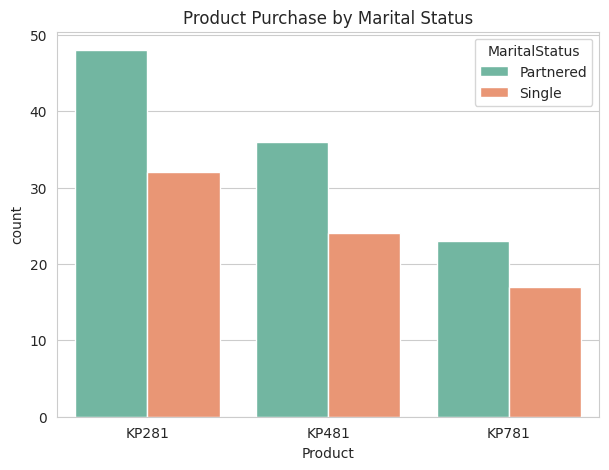

In [26]:
#Marital Status vs Product (Countplot)
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.countplot(df,x='Product',hue='MaritalStatus',palette='Set2')
plt.title('Product Purchase by Marital Status')
plt.ylabel('count')
plt.show()


Insights:


1.   Indicates KP281 appeals broadly, especially to families/couples.
2.   Indicates a weaker product-market fit for singles, or possibly affordability/need gap.
3.   Suggests households with partners have stronger purchasing power and fitness interest.

Recommendations:


1.   For partnered customers → Introduce family/couple packages, referral bonuses
2.   For singles → Create budget-friendly or flexible individual plan
3.   Since KP781 is the least popular product, redesign marketing to highlight its unique features/benefits.





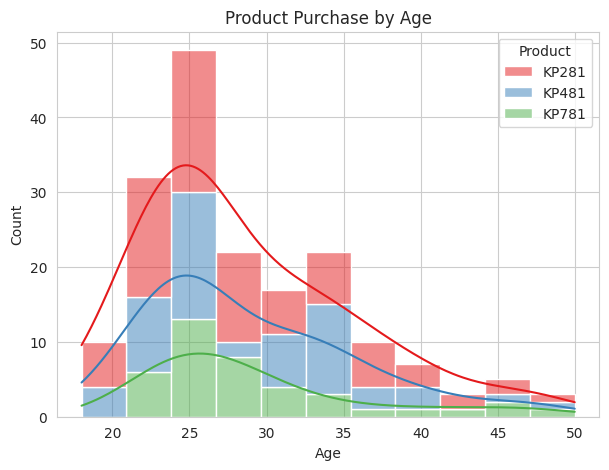

In [30]:
#Age vs Product using Histplot
plt.figure(figsize=(7,5))
sns.histplot(df,x='Age',hue='Product',kde=True,multiple='stack',palette='Set1')
plt.title('Product Purchase by Age')
plt.show()

Insights:


1.   Indicates the core customer base is young adults, especially mid-20s.
2.   Implies weaker engagement from older adults, possibly due to lifestyle, affordability, or product relevance.

Recommendations:


1.   Create Insta Pages about Equipment Advantages to attract 22-30 Age segemnt
     through Social Media like INSTAGRAM,X etc
2.   Create targeted campaigns for family health, low-impact fitness, or wellness to attract older customers.




/tmp/ipython-input-2256168018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Product',y='Age',palette='pastel')


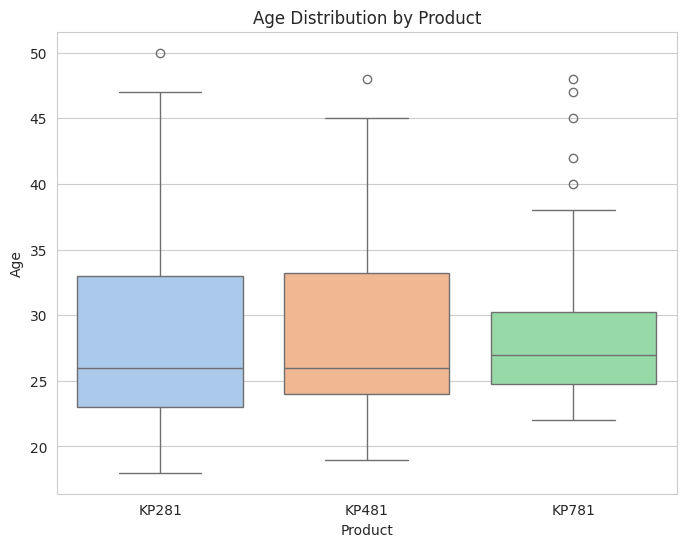

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(df,x='Product',y='Age',palette='pastel')
plt.title("Age Distribution by Product")
plt.show()

Insights:


1.   Suggests KP781 attracts slightly older customers compared to the other two.
2.   KP281 and KP481 have a wider spread (18–45+) compared to KP781 (22–38).
3.   All products have outliers in the 40–50 age range, especially KP781.

Rcommendations:


1.   For KP781 → Position it as a premium/advanced option for slightly older adults (25–35 years).
2.   Since there are some outliers in 40–50 age group, develop special editions or Senior-Friendly Trainers for daily streak.






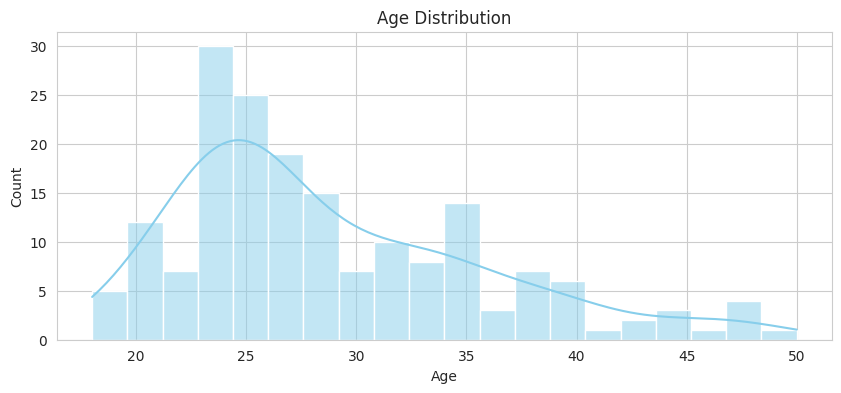

In [38]:
# Age Distribution Overall
plt.figure(figsize=(10,4))
sns.histplot(df['Age'],kde=True,bins=20,color='skyblue')
plt.title('Age Distribution')
plt.show()

Insights:


1.   The business is currently most attractive to college students and early professionals.
2.   Indicates the brand is less appealing to mid-aged and older adults.


Recommendations:


1.   making campaigns college sponsorships,banners in surroundings of colleges or offices targeting 18–28 years to maintain the strong base.
2.   Offer personalized training plans for older customers to make products more relevant.





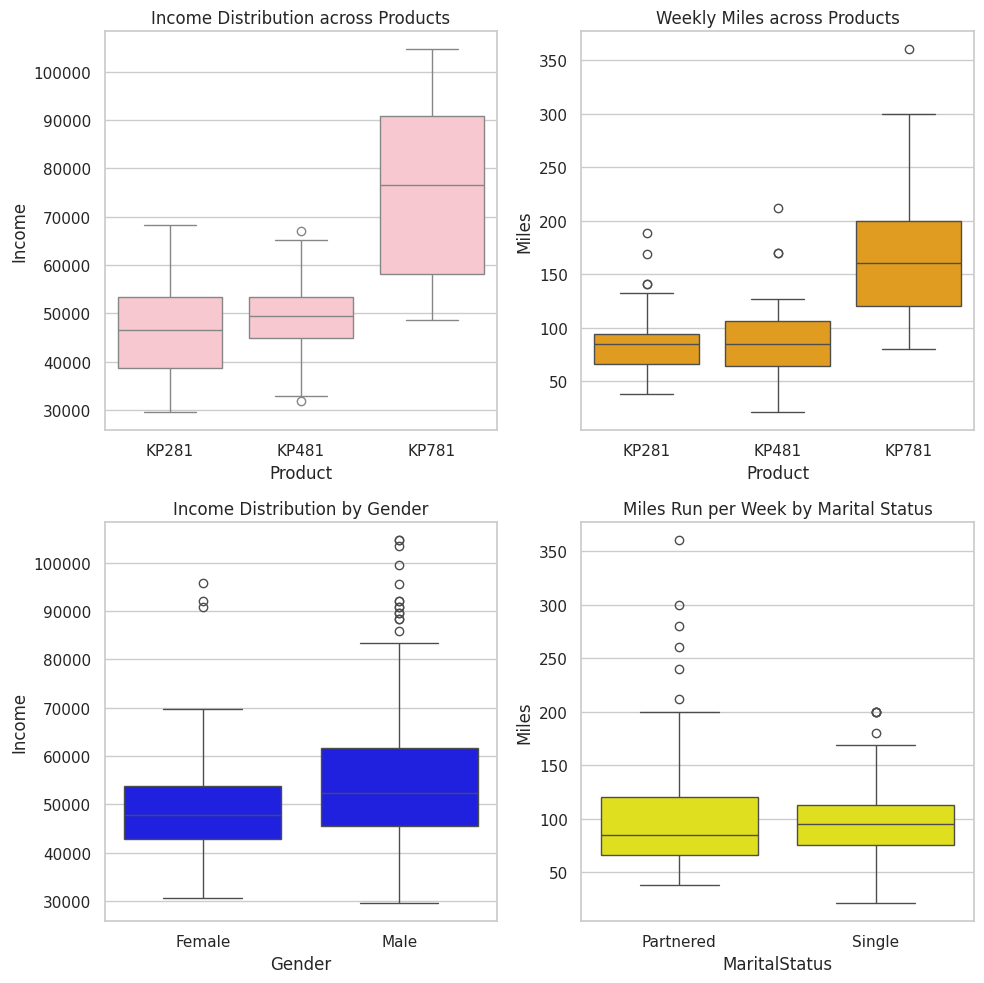

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

# 1. Income vs Product
sns.boxplot(data=df, x="Product", y="Income", ax=axes[0],color='pink')
axes[0].set_title("Income Distribution across Products")


# 2. Miles vs Product
sns.boxplot(data=df, x="Product", y="Miles", ax=axes[1],color='orange')
axes[1].set_title("Weekly Miles across Products")

# 3. Income vs Gender
sns.boxplot(data=df, x="Gender", y="Income", ax=axes[2],color='blue')
axes[2].set_title("Income Distribution by Gender")

# 4. Miles vs Marital Status
sns.boxplot(data=df, x="MaritalStatus", y="Miles", ax=axes[3],color='yellow')
axes[3].set_title("Miles Run per Week by Marital Status")

plt.tight_layout()
plt.show()


Insights:


1.   Customer Segmentation by Income:
                  

    *   KP281 & KP481 buyers: mostly middle-income (₹40K–₹55K).
    *   KP781 buyers: higher income (₹60K–₹100K+).


2.   Product Usage Pattern

    * KP781 users cover the highest weekly miles (~150–200 median, up to 350)
      suggesting intense fitness enthusiasts or athletes.
  
3.  The median income for males is higher than for females, with more male outliers at the high-income end, suggesting a gender-based income gap.

4.  The median miles run per week is slightly higher for partnered individuals compared to singles

Recommendations:
1.  Address the gender pay gap by reviewing compensation structures, promoting pay transparency, and creating targeted career advancement programs for women to ensure equity and motivate performance.

2.  for KP781 sales,give amazon festival offers for customer interaction on purchase.

3.  Investigate causes behind higher variability and outliers in both males' income and partnered individuals’ running mileage—tailor training, support, and resources to help more employees move towards higher performance and satisfaction.



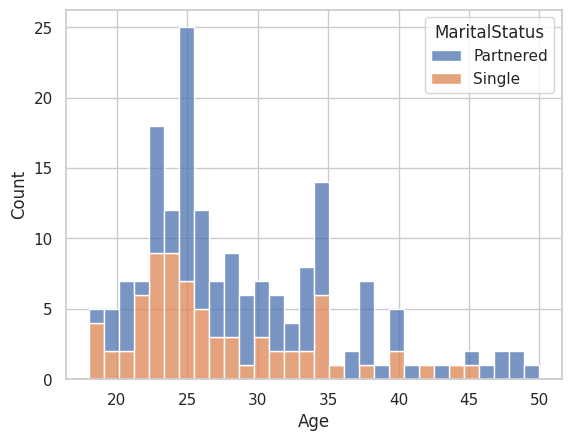

In [54]:
sns.histplot(df,x='Age',bins=30,multiple='stack',hue='MaritalStatus')
plt.show()

Insight:
1. after age 35,singles are less contributed.

In [58]:
#missing value detection
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Insight:No Null values present inside dataset.

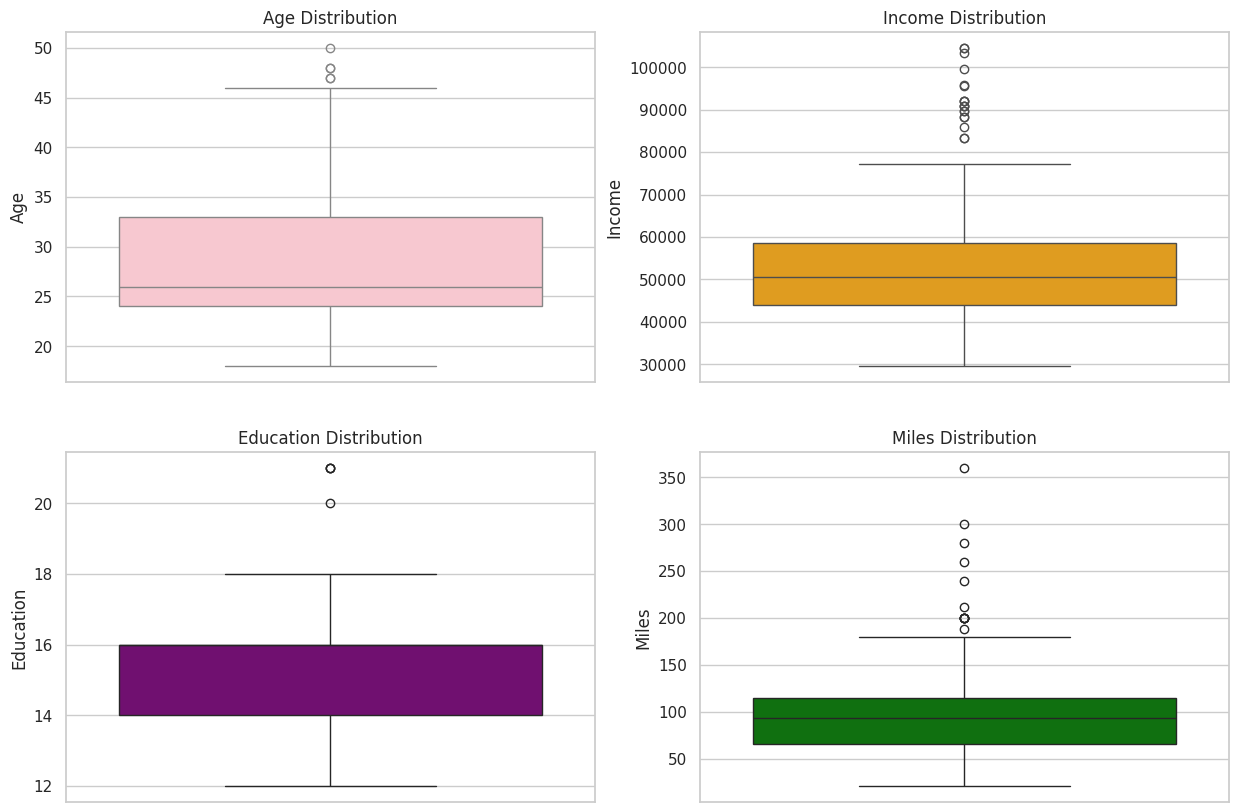

In [64]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes=axes.flatten()

sns.boxplot(df['Age'],ax=axes[0],color='pink')
axes[0].set_title('Age Distribution')

sns.boxplot(df['Income'],ax=axes[1],color='orange')
axes[1].set_title('Income Distribution')


sns.boxplot(df['Education'],ax=axes[2],color='purple')
axes[2].set_title('Education Distribution')

sns.boxplot(df['Miles'],ax=axes[3],color='green')
axes[3].set_title('Miles Distribution')
plt.show()



Insights:

1. these box plots shows several outliers are present in all categorical columns.
2. order of having outliers:
   *  Income > Miles > Age > Education  

In [70]:
mean = df['Age'].mean()
median = df['Age'].median()
print("Mean:", mean, "Median:", median)
c=mean*0.1
c

if abs(mean - median) > 0.1 * mean:  # example threshold 10%
    print("Significant difference detected → Possible outliers present")


Mean: 28.788888888888888 Median: 26.0


In [76]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [73]:
c=mean*0.1
c


np.float64(2.878888888888889)

In [75]:
d=abs(mean-median)
d

np.float64(2.788888888888888)

A large difference between mean and median often indicates skewness due to outliers.

In [81]:
#finding Outliers
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

outliers=df[(df['Age'] < (Q1 - 1.5* IQR))  |  (df['Age'] > (Q3 + 1.5 * IQR))]
print("outliers:\n",outliers)

outliers:
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180  


Only 5 Outliers are present in Age column

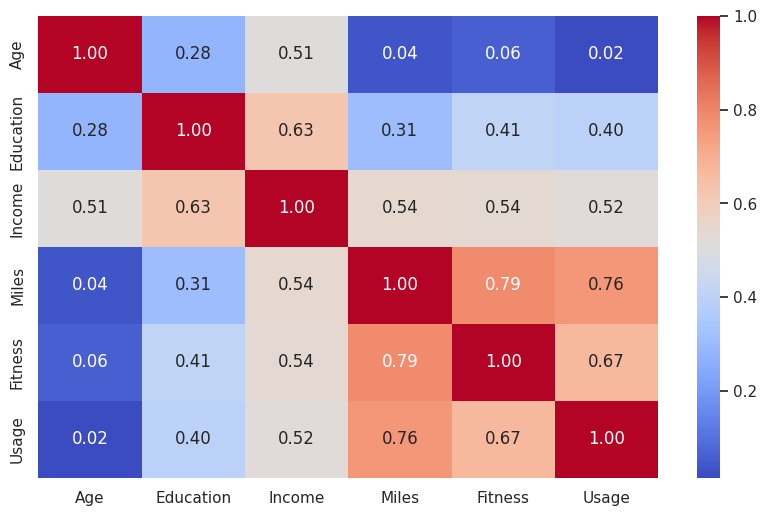

In [84]:
numeric_cols = ['Age', 'Education', 'Income', 'Miles', 'Fitness', 'Usage']

numeric_df = df[numeric_cols]
corr=numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()



*   There is a strong positive correlation (0.79) between Fitness and Miles. This is intuitive, as people who rate themselves as more fit are likely to run more miles.
*   There is a moderate positive correlation (0.67) between Fitness and Usage.
*   the heatmap highlights the interconnectedness of fitness-related behaviors (Usage, Fitness, Miles) and their relationship with income and education. People who are more dedicated to fitness and use the treadmill more frequently tend to have higher incomes and education levels and run more miles.



<Figure size 1000x1000 with 0 Axes>

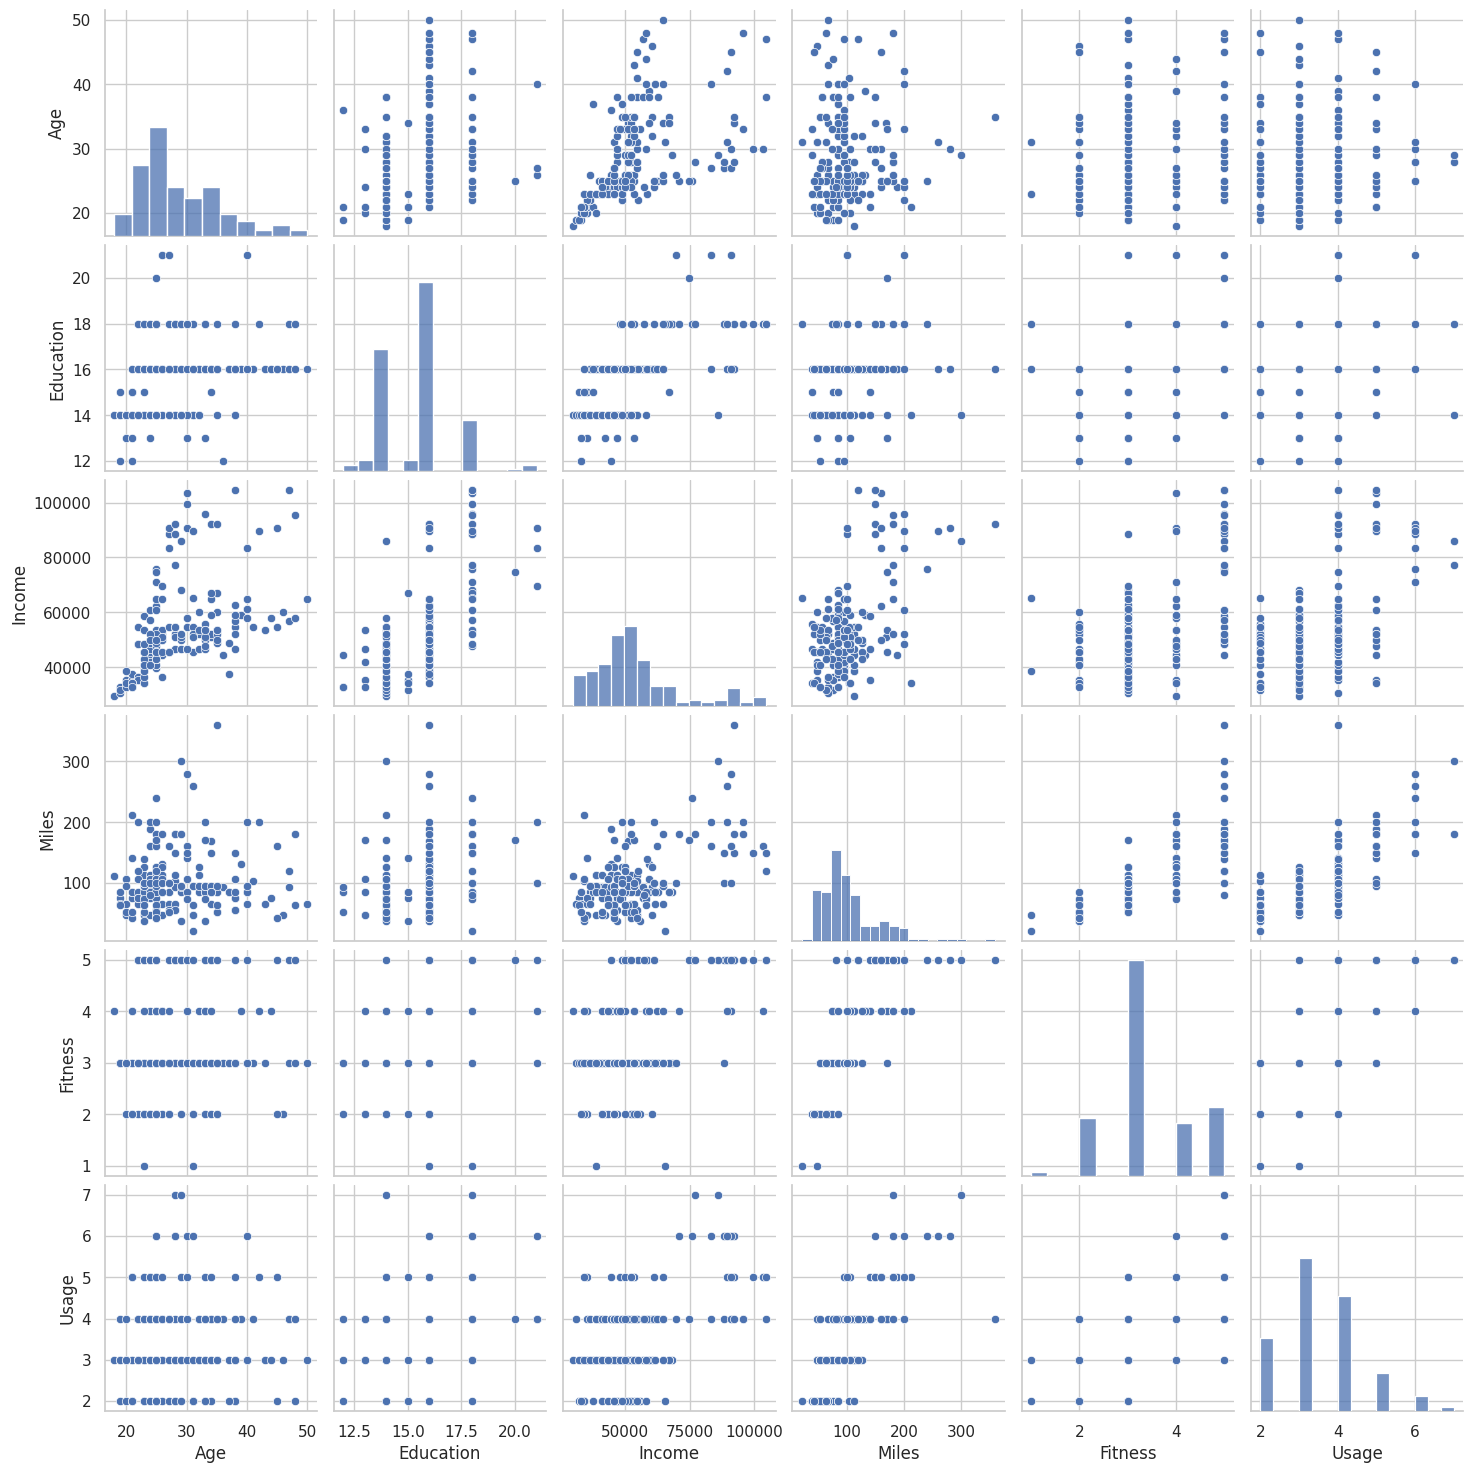

In [90]:

plt.figure(figsize=(10,10))
sns.pairplot(numeric_df)
plt.show()


Insights:
1. Education seems to have a few distinct peaks, suggesting certain common levels of education within the customer base.
2. The distribution of miles run per week is skewed to the right, with most customers running a lower number of miles and a few running a significantly higher number.
3. The reported usage per week also shows peaks at certain values, like 3 or 4 times per week.
4. **Income vs Education , Income vs Age**: The scatter plot shows a clear positive relationship.
5. Higher income individuals tend to run more miles, but there's more variability.


**the pairplot visually confirms many of the correlations seen in the heatmap and provides a better understanding of the distributions of each variable and the nature of their relationships.**


In [91]:
product_counts=pd.crosstab(index=df['Product'],columns='count')
product_counts

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [93]:
product_percent=product_counts/product_counts.sum()*100
product_percent

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [97]:
summary_table=pd.concat([product_counts,product_percent.rename(columns={'count':'percent'})],axis=1)
summary_table

col_0,count,percent
Product,,
KP281,80,44.444444
KP481,60,33.333333
KP781,40,22.222222




1.  KP281 has the highest share, with 80 purchases making up 44.4% of total customers, indicating it is the most popular product and likely the main revenue driver.
2. KP781 is purchased by 40 customers (22.2%), the lowest among the three, suggesting limited demand or market reach relative to the others.


In [98]:
table=pd.crosstab(df['Gender'],df['Product'])
table

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [102]:
male_KP781=table.loc['Male','KP781']/table.loc['Male'].sum()
print("probability of male customer buying KP781 is:",male_KP781)

probability of male customer buying KP781 is: 0.3173076923076923


In [104]:
# Example: Categorize Income Levels
df['Income_Category'] = pd.cut(df['Income'],
                               bins=[0, 30000, 70000, 120000],
                               labels=['Low', 'Middle', 'High'])

# Example: Categorize Age Groups
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 29, 50, 100],
                         labels=['Young', 'Middle-aged', 'Senior'])

# Example: Categorize Usage
df['Usage_Category'] = pd.cut(df['Usage'],
                              bins=[0, 3, 6, 10],
                              labels=['Low', 'Medium', 'High'])

# Grouping for profiling
profile = df.groupby(['Product','Gender','Income_Category','Usage_Category']).size().reset_index(name='Count')
print(profile)


   Product  Gender Income_Category Usage_Category  Count
0    KP281  Female             Low            Low      0
1    KP281  Female             Low         Medium      0
2    KP281  Female             Low           High      0
3    KP281  Female          Middle            Low     32
4    KP281  Female          Middle         Medium      8
5    KP281  Female          Middle           High      0
6    KP281  Female            High            Low      0
7    KP281  Female            High         Medium      0
8    KP281  Female            High           High      0
9    KP281    Male             Low            Low      1
10   KP281    Male             Low         Medium      0
11   KP281    Male             Low           High      0
12   KP281    Male          Middle            Low     23
13   KP281    Male          Middle         Medium     16
14   KP281    Male          Middle           High      0
15   KP281    Male            High            Low      0
16   KP281    Male            H

/tmp/ipython-input-1372101841.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile = df.groupby(['Product','Gender','Income_Category','Usage_Category']).size().reset_index(name='Count')


This shows customer profiling information by creating bins for set of datapoints.

In [110]:
marginal_probability=df['Product'].value_counts(normalize=True)*100
marginal_probability

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


Insight: Marginal Probability → % of overall customers buying each product

In [111]:
joint_prob = table.loc['Male','KP781'] / len(df)
print("P(Male ∩ KP781) =", joint_prob)


P(Male ∩ KP781) = 0.18333333333333332


Joint Probability → % of all customers who are Male AND bought KP781

In [114]:
table1=pd.crosstab(df['Income_Category'],df['Product'])
high_KP781=table1.loc['High','KP781']/table1.loc['High'].sum()
print("probability of high income customer buying KP781 is:",high_KP781)

probability of high income customer buying KP781 is: 1.0


this shows who ever having high income,they all bought KP781 Equipment.

In [120]:
married_Usage = len(df[(df['MaritalStatus']=='Married') & (df['Usage'] > 5)])
married=len(df['MaritalStatus']=='Partnered')
total_married_high_prob=married_Usage/married
print("probability of married customer having usage >5 is:",total_married_high_prob)

probability of married customer having usage >5 is: 0.0


**Recommendations**
1. Promote Popular Products
– Highlight and advertise the treadmill models that customers are already buying the most.

2. Target Premium Buyers
– Offer special deals or loyalty programs to high-income customers who prefer advanced treadmills.

3. Boost Usage with Challenges
– Run weekly or monthly fitness challenges to motivate customers to use their treadmills more often.

4. Segment Offers by Age
– Younger customers can be given flexible payment options, while older customers can be offered easy-to-use models.

5. Focus on Married Families
– Create family packages so multiple members can use fitness services together.

6. Increase Engagement with Personal Guidance
– Provide simple workout plans, diet tips, or motivational messages with every purchase.

7. Reward Regular Users
– Customers who use their treadmills more often should get discounts, freebies, or points.

8. Simplify Marketing Messages
– Instead of technical terms, use everyday language like “Stay Fit at Home” or “Walk Your Way to Health.”

9. Create Community Connections
– Build a small online or offline group where customers can share their progress and inspire each other.

10. Listen to Customer Feedback
– Regularly ask customers what they like and what they don’t, then improve products or services based on their input.